## Branin function as optimization benchmark
https://www.sfu.ca/~ssurjano/branin.html

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
a = 1.; b = 5.1/(4*np.pi**2); c = 5./np.pi
r = 6.; s = 10.; t = 1/(8.*np.pi)


In [52]:
def barnin_function(x):
    """
    barnin function
    input
        x :  a 2 x N np.array; x_1 needs to be in [-5,10], x_2 needs to be in [0,15]
    """
    # fixed values
    a = 1.; b = 5.1/(4*np.pi**2); c = 5./np.pi
    r = 6.; s = 10.; t = 1/(8.*np.pi)
    #x = np.atleast_2d(x)
    x1 = x[0,:]
    x2 = x[1,:]
    assert (-5 <= x1).any()
    assert ( x1 <= 10).any()
    assert (0 <= x2).any()
    assert ( x2 <= 15).any()
    
    res = a*(x2-b*x1**2+c*x1-r)**2 + s*(1-t)-np.cos(x1)+s
    return res 

N = 100
x = np.random.random((2,N))*15+np.array([[-5],[0]])
y = barnin_function(x)

In [ ]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.Matern()
model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=1e-5,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

[0.         6.06060606]


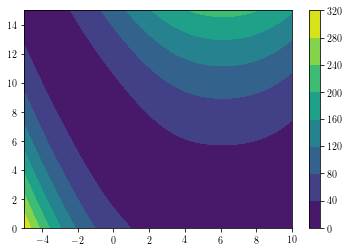

In [54]:
lambdas = np.linspace(-5, 10, 100)
gammas = np.linspace(0, 15, 100)

# We need the cartesian combination of these two vectors
param_grid = np.array([[C, gamma] for gamma in gammas for C in lambdas])

real_loss = [barnin_function(params[:,np.newaxis]) for params in param_grid]

# The maximum is at:
print param_grid[np.array(real_loss).argmin(), :]
from matplotlib import rc
rc('text', usetex=True)

C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape))
plt.colorbar(cp)
plt.show()

In [58]:
model.fit(x.transpose(), y)

GaussianProcessRegressor(alpha=1e-05, copy_X_train=True,
             kernel=Matern(length_scale=1, nu=1.5),
             n_restarts_optimizer=10, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=None)

[6.36363636 1.06060606]


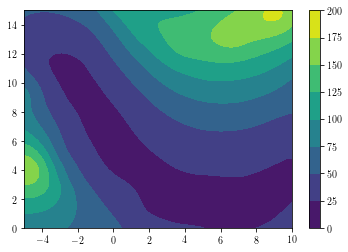

In [65]:

real_loss = [model.predict(params.reshape(1,-1)) for params in param_grid]

# The maximum is at:
print param_grid[np.array(real_loss).argmin(), :]
from matplotlib import rc
rc('text', usetex=True)

C, G = np.meshgrid(lambdas, gammas)
plt.figure()
cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape))
plt.colorbar(cp)
plt.show()

array([83.14406227])